# K Nearest Neighbour

Data used is :- **Classified Data.csv**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

In [31]:
#Reading the csv file
df=pd.read_csv('Classified Data.csv',index_col=0) #index_col removes the first column i.e. unnamed one

In [32]:
#Head of the dataset
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardizing the data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1)) #different from algorithm---  fit method.It is which columns we need to standardize

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1)) #standardizes the data

In [9]:
scaled_features #scaled version of the actual values

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
#putting all the standardized data into the dataframe and just skipping the last column as it is "TARGET CLASS"
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Model Building

In [1]:
#splitting train-test
from sklearn.model_selection import train_test_split

In [13]:
X=df_feat
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
X.head(1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314


In [15]:
y.head(1)

0    1
Name: TARGET CLASS, dtype: int64

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
prediction=knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,prediction))
print("\n")
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



[[151   8]
 [ 15 126]]


**Note**--<br>
To predict the value of 'k' we need to use the **elbow method**.In this method, we take the different value of k and produce a error rate list and see which k has the lowest error rate

In [22]:
error_rate=[]

In [23]:
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

we are checking here that if the pred_i value is not equal to y_test, then it will take out the mean of that error and will append it to a list, as we are calculating the error rate here of the algorithm.Also if we have a plot that is continuously decreasing as in the exercise, try it with increasing the size in the loop(larger k value)

Text(0, 0.5, 'Error rate')

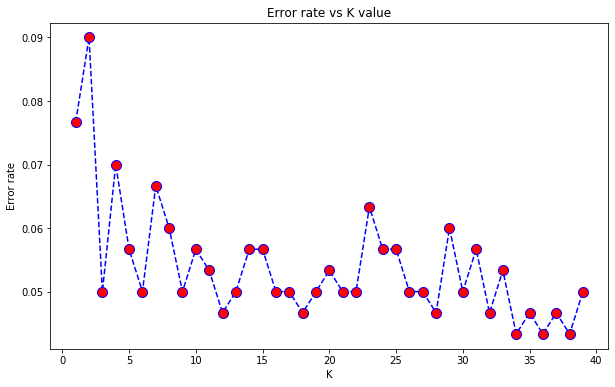

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

***Need to select k value where the error rate is minimum***<br>
example - 17

In [25]:
knn=KNeighborsClassifier(n_neighbors=17)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [27]:
pred=knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

